<a href="https://colab.research.google.com/github/dipanjan0/Python-Training/blob/master/DecisionTreePruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision trees are one of the most common and powerful data structres.


1.   Low cost to process
2.   Easy to understand




In [13]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/Training/Datasets/Titanic_train.csv")
data = data.loc[:,('Survived','Pclass','Sex','Age','SibSp','Parch','Fare')]

# drop rows with missing values
data.dropna(inplace=True)

# transform the values from ‘female’ and ‘male’ to 0 and 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex)

# Splitting data set into train and test sets
x = data.iloc[:,1:]   # Second column until the last column
y = data.iloc[:,0]    # First column (Survived) is our target
from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
#test_size=.3 means that our test set will be 30% of the train set.

from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)  #train parameters: features and target
pred = dtree.predict(x_test)  #parameter: new data to predict

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)
#parameters: targets to be predicted and predictions from new data used before

0.7813953488372093

# Visualizing the tree

**StringIO()**: creates an object (empty in this case) to receive a string buffer (the tree will be created first as a string before as an image) in DOT (graph description language) format.

**export_graphviz()**: this function exports the tree in DOT format, generating a representation of the decision tree, which is written into the ‘out_file’.

**graph_from_dot_data()**: will use the DOT object to create the graph.

**Image()**: uses raw data to return an image (png, jpeg, gif).

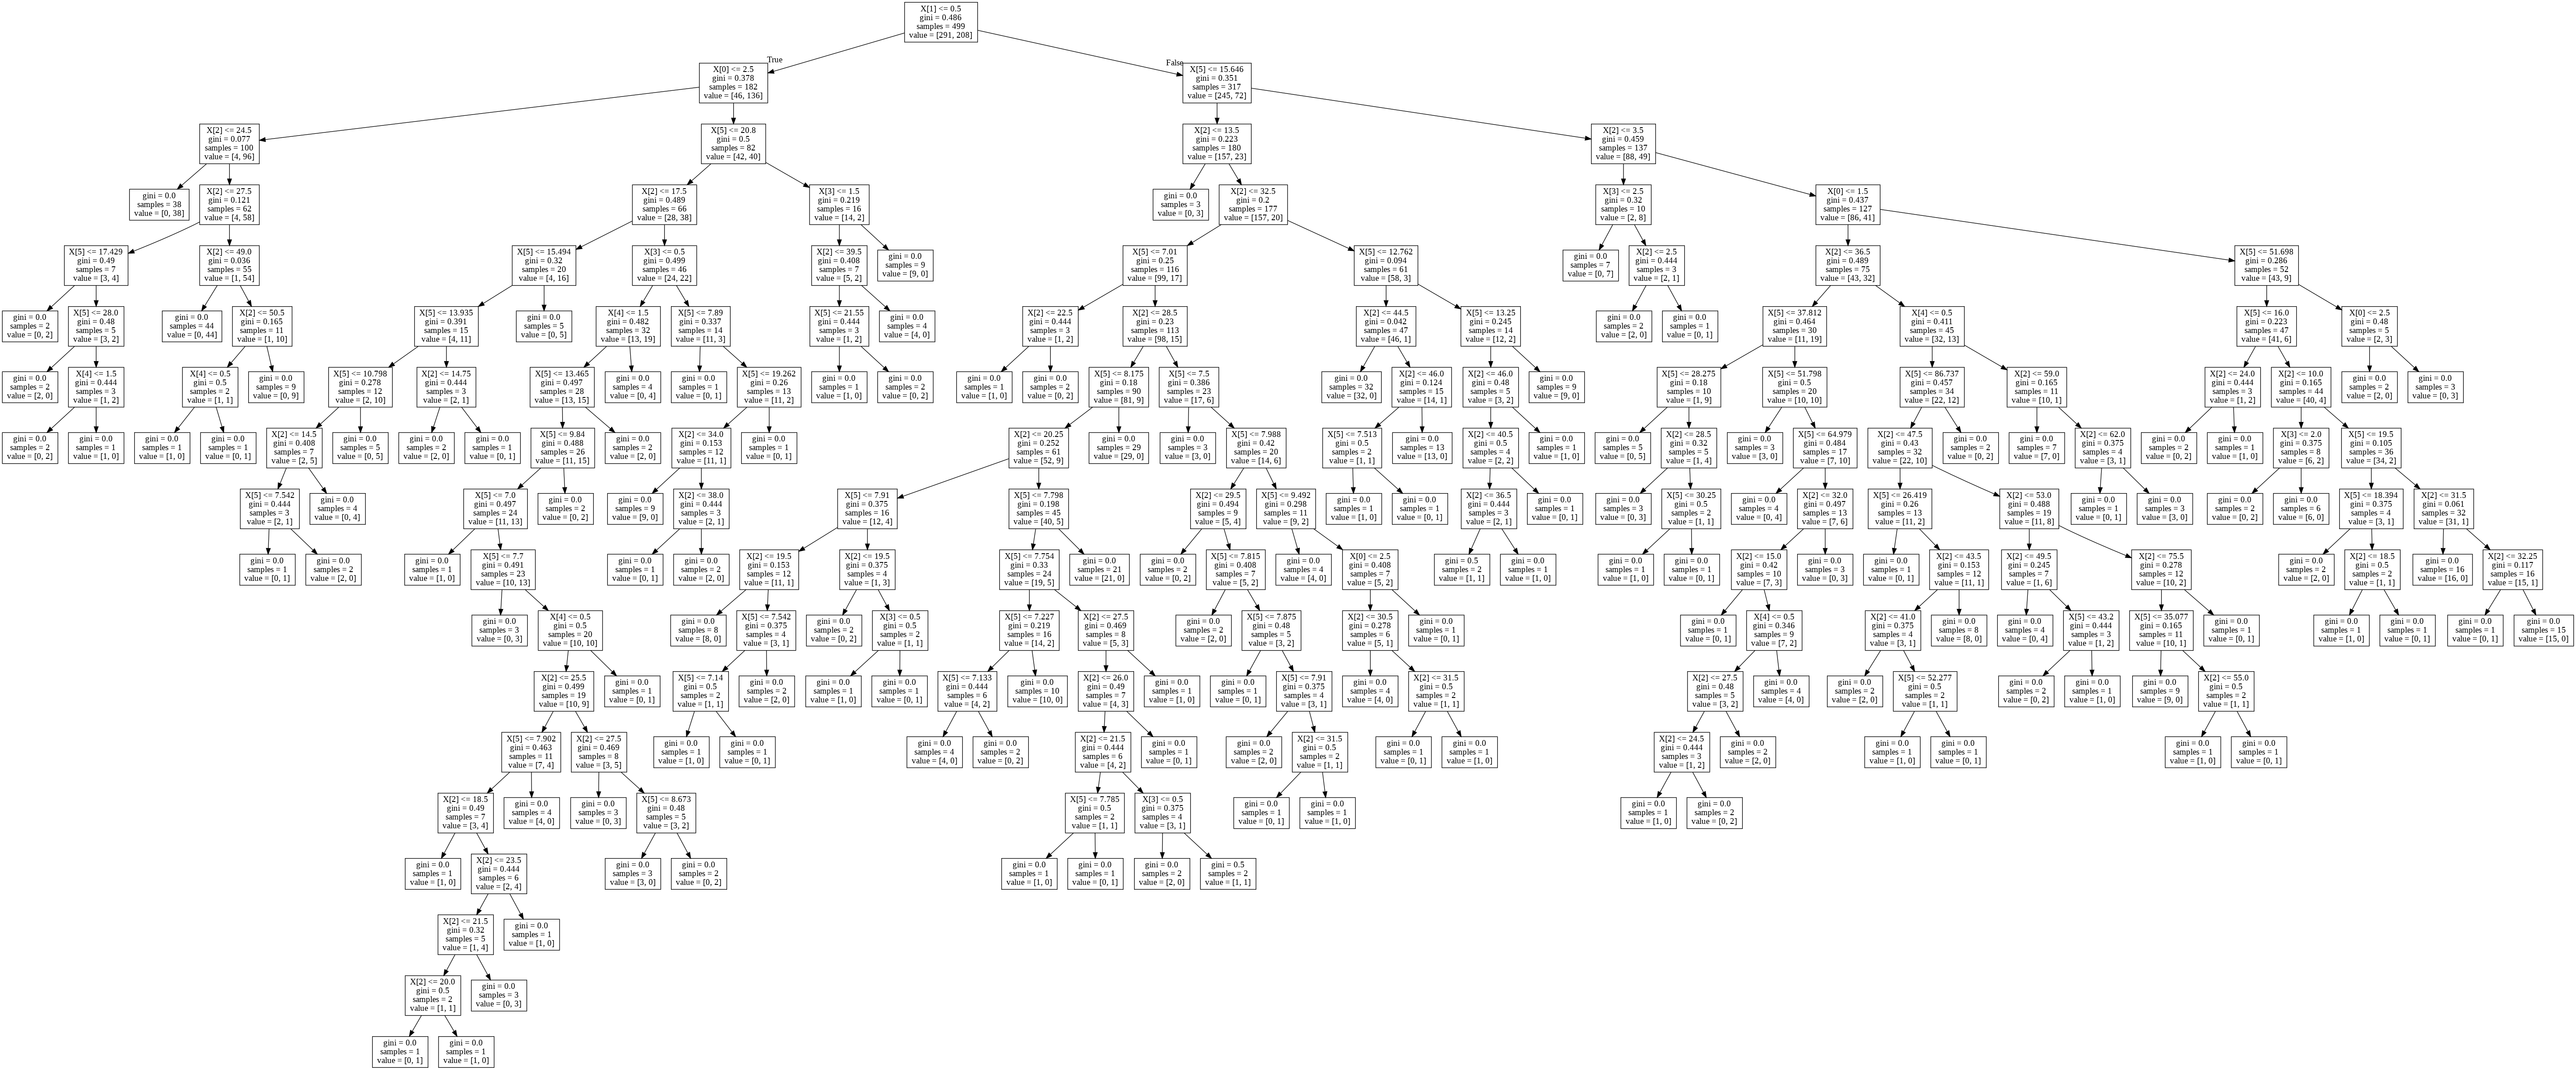

In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())